In [29]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
model = LinearRegression()

In [7]:
diameter = [6,8,10,14,18]
toppings = [2,1,0,2,0]
price = [7,9,13,17.5,18]

X_train = pd.DataFrame({'Diameter':diameter,
                   'Toppings':toppings})

y_train = pd.DataFrame({'Price':price})
X_train,y_train

(   Diameter  Toppings
 0         6         2
 1         8         1
 2        10         0
 3        14         2
 4        18         0,    Price
 0    7.0
 1    9.0
 2   13.0
 3   17.5
 4   18.0)

In [8]:
model.fit(X_train,y_train)
model.coef_,model.intercept_


(array([[1.01041667, 0.39583333]]), array([1.1875]))

In [23]:
x_b = np.column_stack((np.ones(5),X_train))
x_b


array([[ 1.,  6.,  2.],
       [ 1.,  8.,  1.],
       [ 1., 10.,  0.],
       [ 1., 14.,  2.],
       [ 1., 18.,  0.]])

In [44]:
theta_best = np.linalg.inv(x_b.T @ x_b) @ x_b.T @y_train
theta_best

,Price
0,1.187500
1,1.010417
2,0.395833


In [50]:
X_train

,Diameter,Toppings
0,6,2
1,8,1
2,10,0
3,14,2
4,18,0


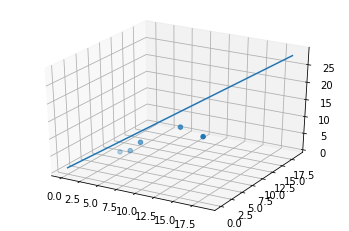

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_model = np.arange(20)
y_model = np.arange(20)
z_model = theta_best.iloc[0,0] + x_model * theta_best.iloc[1,0] + y_model * theta_best.iloc[2,0] 
x_model,y_model,z_model

ax.plot(x_model,y_model,z_model)
ax.scatter3D(X_train.Diameter,X_train.Toppings,y_train)

### Gradient Descent

In [94]:
rng = np.random.RandomState(0)
X = 2 * rng.rand(100,1)

y = 4 + 3 * X + rng.randn(100,1)

x_b = np.column_stack((np.ones(100),X))

eta = 0.1
n_iterations = 1000
m = 100

theta = rng.randn(2,1)
print("org theta",theta)
tolerance = 0.00007
count = 0

for iter in range(n_iterations):
    count += 1
    gra = 2 /m * x_b.T @ (x_b @ theta -y)
    prev_theta = theta
    theta = theta - eta * gra
    
    sqrt_comp = np.sqrt(((prev_theta - theta)**2).sum())
    print('sqrt_comp',sqrt_comp)
    if sqrt_comp < tolerance:
        print("count", count)
        break
    

theta

org theta [[-0.35399391]
 [-1.37495129]]
sqrt_comp 2.5970284424746586
sqrt_comp 1.5241740256126848
sqrt_comp 0.8945841052832386
sqrt_comp 0.525153181827616
sqrt_comp 0.30843467231158683
sqrt_comp 0.18139097055848816
sqrt_comp 0.10705725173621848
sqrt_comp 0.06378343347415749
sqrt_comp 0.038915699575274874
sqrt_comp 0.02505311628742256
sqrt_comp 0.01776293641669568
sqrt_comp 0.01420296516675401
sqrt_comp 0.012515435546716577
sqrt_comp 0.01164414191521402
sqrt_comp 0.011097960969505214
sqrt_comp 0.010679086746313942
sqrt_comp 0.010313304965161968
sqrt_comp 0.009973468710310409
sqrt_comp 0.009649624860156634
sqrt_comp 0.009338005170581438
sqrt_comp 0.009037057201195717
sqrt_comp 0.00874602484362802
sqrt_comp 0.008464442065292859
sqrt_comp 0.00819195242009622
sqrt_comp 0.007928244598234683
sqrt_comp 0.0076730292907536525
sqrt_comp 0.007426030764917952
sqrt_comp 0.007186983681106381
sqrt_comp 0.006955631781001808
sqrt_comp 0.006731727247484197
sqrt_comp 0.006515030309139058
sqrt_comp 0.0063

array([[4.22059985],
       [2.96984396]])